<a href="https://colab.research.google.com/github/alracey/level4-project/blob/main/piecewise_linear_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

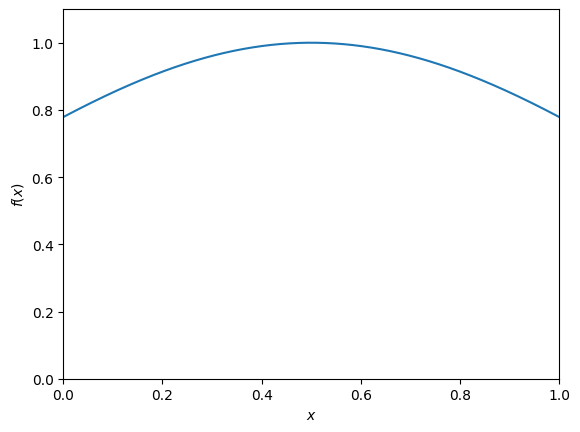

In [2]:
def f(x):
  return torch.exp(-(x-0.5)**2)

xs = torch.linspace(0, 1, 10000)
f_evals = f(xs)
plt.plot(xs, f_evals)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.show()

In [ ]:
def g(x, y_params):

  #bins
  K = len(y_params) + 1

  #using given params, append 0 and 1 to the ends
  x_bins = torch.linspace(0, 1, K+1)
  ys = torch.cat([torch.tensor([0.0]), y_params, torch.tensor([1.0])])

  #find the correct bin indices i for each x value
  i_values = torch.clamp((x * K).long(), max=K-1)

  #compute the edges
  x_left = x_bins[i_values]
  x_right = x_bins[i_values+1]
  y_left = ys[i_values]
  y_right = ys[i_values+1]

  #compute the linear mappings for all x

  return y_left + ((y_right - y_left) / (x_right - x_left)) * (x - x_left)


